In [110]:
import pandas as pd
import os
import numpy as np
import glob
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
import fastcluster
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
import ipaddress

# Using CICFlowMeter, dataset is generated. CICFlowMeter is a network traffic flow generator distributed by CIC to generate 84 network traffic features. It reads pcap file and generate a graphical report of the features extracted and also provides csv file of the report. It is an open source application written in Java and can be downloaded from Github. 

In [111]:
data = pd.read_csv("all-csv-files.csv")
pd.options.display.max_columns = None
display(data)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,8,14,24,28,29,33,36,38,44,55,57,64,66,69,81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,192.168.4.18-52.95.121.5-35392-443-6,192.168.4.18,35392.0,52.95.121.5,443.0,6.0,20/03/2021 10:23:33 p.m.,4322632.0,157.0,164.0,27926.0,48977.0,1460.0,0.0,177.872611,251.599186,1460.0,0.0,298.640244,481.190445,17790.781172,74.260312,13508.225000,63697.893515,1103307.0,14.0,4322632.0,27709.179487179503,91975.706467,1103307.0,43.0,4275166.0,26228.012269938637,93009.802922,1154398.0,14.0,1.0,0.0,0.0,0.0,3140.0,3280.0,36.320464,37.939848,0.0,1460.0,239.754658,389.864285,151994.160804,0.0,0.0,0.0,187.0,321.0,0.0,0.0,0.0,1.0,240.501558,177.872611,298.640244,0.0,0.0,0.0,0.0,99.0,23913.0,0.0,86.0,0.0,152.0,7363.0,3076.0,127.0,20.0,0.0,0.0,0.0,0.0,1.616290e+15,1051488.17166,1.616290e+15,1.616290e+15,No Label
1,1,52.95.115.208-192.168.4.18-443-56342-6,52.95.115.208,443.0,192.168.4.18,56342.0,6.0,02/03/2021 10:23:26 p.m.,7613678.0,170.0,150.0,55046.0,26022.0,1460.0,0.0,323.800000,530.008547,1460.0,0.0,173.480000,252.653640,10647.679085,42.029621,23867.329154,164442.47551,2220469.0,46.0,7609854.0,45028.721893491136,227592.236501,2267131.0,46.0,7587412.0,50922.22818791948,247746.696557,2316640.0,52.0,1.0,0.0,0.0,0.0,3400.0,3084.0,22.328236,19.701385,0.0,1460.0,252.691589,428.764061,183838.620210,0.0,0.0,0.0,154.0,320.0,0.0,0.0,0.0,0.0,253.481250,323.800000,173.480000,0.0,0.0,0.0,0.0,86.0,23475.0,0.0,172.0,0.0,81.0,7280.0,12851.0,57.0,20.0,0.0,0.0,0.0,0.0,1.614738e+15,1652020.560758,1.614738e+15,1.614738e+15,No Label
2,2,192.168.4.18-52.95.117.89-54936-443-6,192.168.4.18,54936.0,52.95.117.89,443.0,6.0,20/03/2021 11:55:13 p.m.,6144574.0,147.0,158.0,28989.0,26260.0,1460.0,0.0,197.204082,280.708056,1460.0,0.0,166.202532,382.720812,8991.510233,49.637290,20212.414474,150488.377817,2606008.0,18.0,6144574.0,42086.12328767124,217105.697557,2606008.0,22.0,6095710.0,38826.17834394905,212640.179861,2654198.0,18.0,1.0,0.0,0.0,0.0,2940.0,3160.0,23.923546,25.713744,0.0,1460.0,181.526144,336.752924,113402.532101,0.0,0.0,0.0,157.0,305.0,0.0,0.0,0.0,1.0,182.121311,197.204082,166.202532,0.0,0.0,0.0,0.0,83.0,15626.0,0.0,95.0,0.0,86.0,5245.0,3088.0,126.0,20.0,0.0,0.0,0.0,0.0,1.616295e+15,1270536.273392,1.616295e+15,1.616295e+15,No Label
3,3,192.168.4.18-52.95.117.89-35610-443-6,192.168.4.18,35610.0,52.95.117.89,443.0,6.0,13/03/2021 02:11:12 a.m.,9068560.0,148.0,179.0,27984.0,45831.0,1460.0,0.0,189.081081,276.208107,1460.0,0.0,256.039106,445.147159,8139.660541,36.058647,27817.668712,290236.297037,5214133.0,43.0,9023461.0,61384.08843537414,431266.79562,5214133.0,55.0,9022658.0,50689.08988764046,395603.039366,5261135.0,43.0,1.0,0.0,0.0,0.0,2960.0,3580.0,16.320121,19.738525,0.0,1460.0,225.948171,378.531995,143286.471312,0.0,0.0,0.0,172.0,327.0,0.0,0.0,0.0,1.0,226.639144,189.081081,256.039106,0.0,0.0,0.0,0.0,90.0,19383.0,0.0,85.0,0.0,140.0,11085.0,3220.0,114.0,20.0,0.0,0.0,0.0,0.0,1.615616e+15,1687025.39444,1.615616e+15,1.615616e+15,No Label
4,4,192.168.4

In [112]:
dataset = data.convert_dtypes()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122007 entries, 0 to 122006
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         122007 non-null  Int64  
 1   Flow ID            122003 non-null  string 
 2   Src IP             122007 non-null  string 
 3   Src Port           122006 non-null  Float64
 4   Dst IP             122006 non-null  string 
 5   Dst Port           122006 non-null  object 
 6   Protocol           122005 non-null  Float64
 7   Timestamp          122005 non-null  string 
 8   Flow Duration      122005 non-null  object 
 9   Tot Fwd Pkts       122004 non-null  Float64
 10  Tot Bwd Pkts       122004 non-null  Float64
 11  TotLen Fwd Pkts    122004 non-null  Float64
 12  TotLen Bwd Pkts    122004 non-null  Int64  
 13  Fwd Pkt Len Max    122004 non-null  Float64
 14  Fwd Pkt Len Min    122004 non-null  object 
 15  Fwd Pkt Len Mean   122003 non-null  Float64
 16  Fw

In [113]:
# Detecting missing values
def get_missing_count(dataset):
    return data.isnull().sum()

print("Number of missing values :")
print(get_missing_count(data))

Number of missing values :
Unnamed: 0     0
Flow ID        4
Src IP         0
Src Port       1
Dst IP         1
              ..
Idle Mean     16
Idle Std      16
Idle Max      17
Idle Min      17
Label         17
Length: 85, dtype: int64


In [114]:
data = data.dropna()

In [115]:
duplicates = data[data.duplicated()]
duplicates

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [116]:
data['Idle Max'].mean()

1046325693467771.2

In [117]:
data = data.drop(['Unnamed: 0'], axis=1)

In [118]:
data = data.drop(['Flow ID'], axis=1)

In [119]:
data = data.drop(['Timestamp'], axis=1)

In [120]:
data = data.drop(['Label'], axis=1)

In [121]:
data = data.drop(['URG Flag Cnt'], axis=1)

In [122]:
data = data.drop(['Bwd PSH Flags'], axis=1)

In [123]:
data = data.drop(['ECE Flag Cnt'], axis=1)

In [124]:
data = data.drop(['Fwd Blk Rate Avg'], axis=1)

In [125]:
data = data.drop(['Subflow Fwd Pkts'], axis=1)

In [126]:
# Since I want to find anomaly in the transmitted packages, I am gonna remove all the BWD packets!

In [139]:
BWd = [col for col in data.columns if "Bwd" in col]
BWd

['Tot Bwd Pkts', 'TotLen Bwd Pkts', 'Subflow Bwd Byts', 'Init Bwd Win Byts']

In [140]:
data = data.drop(BWd, axis = 1)

In [141]:
# find columns with zero variance
zero_var_cols = []
for col in data.columns:
    # skip string columns
    if data[col].dtype == object:
        continue
    if data[col].var() == 0:
        zero_var_cols.append(col)
        print(col)

# remove columns with zero variance
data = data.drop(zero_var_cols, axis=1)

Zero variance columns are columns in a dataset that have the same value for every sample or observation. These columns do not provide any useful information for machine learning models because they do not vary across the data, and thus they do not contribute to the predictive power of the model.

Removing zero variance columns can also help to reduce the dimensionality of the data, which can improve the performance of machine learning models by reducing the risk of overfitting and speeding up the training process.

In [142]:
# Data Cleaning is done!

In [143]:

# Converting each IP to the correspanding int value

data['Src IP'] = [int(ip.split('.')[0]) * 256**3 +
          int(ip.split('.')[1]) * 256**2 +
          int(ip.split('.')[2]) * 256 +
          int(ip.split('.')[3]) for ip in data['Src IP']]

data['Dst IP'] = [int(ip.split('.')[0]) * 256**3 +
          int(ip.split('.')[1]) * 256**2 +
          int(ip.split('.')[2]) * 256 +
          int(ip.split('.')[3]) for ip in data['Dst IP']]

AttributeError: 'float' object has no attribute 'split'

In [144]:
# Get the distinct values of a feature
for col1 in data.columns:
    count = len(data[col1].unique())
    if count < 20:
        data[col1] = data[col1].astype(object)
        print("Distinct values of", col1, ":", count,data[col1].unique(), data[col1].dtype)
    else:
        data[col1] = data[col1].astype(float)

Distinct values of Protocol : 3 [6.0 17.0 0.0] object
Distinct values of Fwd PSH Flags : 2 [1.0 0.0] object
Distinct values of FIN Flag Cnt : 3 [0.0 1.0 2.0] object
Distinct values of SYN Flag Cnt : 5 [0.0 2.0 1.0 3.0 4.0] object
Distinct values of RST Flag Cnt : 8 [0.0 2.0 1.0 4.0 6.0 3.0 5.0 7.0] object
Distinct values of Down/Up Ratio : 7 [1.0 0.0 2.0 3.0 4.0 5.0 6.0] object
Distinct values of Fwd Seg Size Min : 6 [20.0 8.0 32.0 0.0 40.0 44.0] object


In [145]:
pd.options.display.max_columns = None
display(data)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Fwd PSH Flags,Fwd Header Len,Fwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Subflow Fwd Byts,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.530355,-0.017253,-0.589784,-0.519333,6.0,0.233281,1.287908,0.988005,0.977229,-0.087399,0.220424,0.227579,-0.270287,-0.476252,-0.049836,-0.255007,-0.182422,-0.029721,0.235307,-0.056625,-0.222758,-0.184452,-0.065524,1.0,1.249060,-0.475314,-0.084344,0.918516,0.554574,0.628459,0.304568,0.0,0.0,0.0,1.605342,1.302780,1.0,0.524657,0.220424,0.103815,-0.114001,1.422665,20.0,0.738435,-0.005206,0.738405,0.738458
1,-1.874354,-1.658862,1.621584,2.309783,6.0,0.966995,1.467410,2.789330,0.977229,-0.087399,1.150640,1.514992,-0.295627,-0.478485,0.011059,0.386161,0.240272,-0.029517,0.968897,0.043106,0.391901,0.255598,-0.065505,1.0,1.424547,-0.476283,-0.084344,0.918516,0.640125,0.798993,0.552017,0.0,0.0,0.0,1.176854,1.296095,0.0,0.610176,1.150640,1.072920,-0.122187,0.200474,20.0,0.736425,-0.005206,0.736395,0.736448
2,0.530355,0.900759,-0.589785,-0.519333,6.0,0.639469,1.149829,1.058610,0.977229,-0.087399,0.343653,0.362183,-0.301503,-0.477958,-0.010426,0.297353,0.386146,-0.029695,0.641899,0.026161,0.344373,0.383730,-0.065654,1.0,1.114071,-0.476172,-0.084344,0.918516,0.169513,0.395622,0.004690,0.0,0.0,0.0,1.215808,1.195822,1.0,0.140008,0.343653,0.205233,-0.322890,1.405206,20.0,0.738443,-0.005206,0.738412,0.738465
3,0.530355,-0.007013,-0.589785,-0.519333,6.0,1.291350,1.163637,0.991858,0.977229,-0.087399,0.291873,0.341375,-0.304525,-0.478898,0.034280,1.186749,1.372967,-0.029536,1.284363,0.137285,1.315021,1.369880,-0.065450,1.0,1.127570,-0.476699,-0.084344,0.918516,0.463272,0.578779,0.236904,0.0,0.0,0.0,1.410575,1.342890,1.0,0.433322,0.291873,0.092547,0.253083,1.195687,20.0,0.737562,-0.005206,0.737532,0.737585
4,0.530355,0.441753,-0.589785,-0.519333,6.0,1.342100,1.384563,1.162293,0.977229,-0.087399,0.274020,0.229682,-0.304579,-0.478893,0.033882,0.694068,0.622138,-0.029695,1.311107,0.106822,0.762278,0.625998,-0.065604,1.0,1.343553,-0.476607,-0.084344,0.918516,0.456983,0.755544,0.486739,0.0,0.0,0.0,1.241777,1.403054,1.0,0.426915,0.274020,0.148890,0.094394,1.667104,20.0,0.736686,-0.005206,0.736656,0.736709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122002,0.530355,0.334282,-0.279048,-0.519333,6.0,-0.729105,-0.866115,-0.866855,-1.090307,-0.087399,-0.913428,-0.935860,-0.333400,-0.457862,-0.094630,-0.660399,-0.597646,0.007700,-0.729349,-0.216183,-0.639622,-0.601620,-0.065790,0.0,-0.848674,-0.466069,-0.084344,-1.137813,-1.030906,-1.080682,-0.876510,0.0,0.0,0.0,-0.822756,-0.829699,1.0,-1.059932,-0.913428,-0.865289,-0.714137,-0.794739,32.0,-1.355527,-0.005206,-1.355546,-1.355448
122003,0.530355,1.077185,-0.589784,-0.519333,6.0,2.422507,1.950684,1.315857,0.977229,-0.087399,0.108423,0.109299,-0.305767,-0.479246,0.060561,1.385500,1.377598,-0.029581,2.426710,0.183012,1.511428,1.407816,-0.065437,1.0,1.905109,-0.476825,-0.084344,0.918516,0.629224,0.732567,0.452835,0.0,0.0,0.0,2.267551,2.091597,1.0,0.597880,0.108423,-0.031409,-0.017151,1.981382,20.0,0.738185,-0.005206,0.738155,0.738208
122004,0.530355,1.150836,1.621584,-0.539072,17.0,-0.729027,-0.866115,-0.864729,-1.044991,1.015378,-0.709443,-0.935860,-0.287897,-0.459179,-0.092578,-0.660399,-0.597514,0.009924,-0.729349,-0.216183,-0.639622,-0.601620,-0.065790,0.0,-0.864873,-0.466727,1.105396,-1.070208,-0.784024,-1.040185,-0.875847,0.0,0.0,0.0,-0.822756,-0.843069,1.0,-0.690966

In [146]:

# create a StandardScaler object
scaler = StandardScaler()

# Print the standard deviation of each feature and whether it needs standardization
for col in data.columns:
    if data[col].dtype != 'object': # check if the column is not categorical
           data[col] = scaler.fit_transform(pd.DataFrame(data[col] ))
            


In [147]:
pd.options.display.max_columns = None
display(data)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Fwd PSH Flags,Fwd Header Len,Fwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Subflow Fwd Byts,Init Fwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.530355,-0.017253,-0.589784,-0.519333,6.0,0.233281,1.287908,0.988005,0.977229,-0.087399,0.220424,0.227579,-0.270287,-0.476252,-0.049836,-0.255007,-0.182422,-0.029721,0.235307,-0.056625,-0.222758,-0.184452,-0.065524,1.0,1.249060,-0.475314,-0.084344,0.918516,0.554574,0.628459,0.304568,0.0,0.0,0.0,1.605342,1.302780,1.0,0.524657,0.220424,0.103815,-0.114001,1.422665,20.0,0.738435,-0.005206,0.738405,0.738458
1,-1.874354,-1.658862,1.621584,2.309783,6.0,0.966995,1.467410,2.789330,0.977229,-0.087399,1.150640,1.514992,-0.295627,-0.478485,0.011059,0.386161,0.240272,-0.029517,0.968897,0.043106,0.391901,0.255598,-0.065505,1.0,1.424547,-0.476283,-0.084344,0.918516,0.640125,0.798993,0.552017,0.0,0.0,0.0,1.176854,1.296095,0.0,0.610176,1.150640,1.072920,-0.122187,0.200474,20.0,0.736425,-0.005206,0.736395,0.736448
2,0.530355,0.900759,-0.589785,-0.519333,6.0,0.639469,1.149829,1.058610,0.977229,-0.087399,0.343653,0.362183,-0.301503,-0.477958,-0.010426,0.297353,0.386146,-0.029695,0.641899,0.026161,0.344373,0.383730,-0.065654,1.0,1.114071,-0.476172,-0.084344,0.918516,0.169513,0.395622,0.004690,0.0,0.0,0.0,1.215808,1.195822,1.0,0.140008,0.343653,0.205233,-0.322890,1.405206,20.0,0.738443,-0.005206,0.738412,0.738465
3,0.530355,-0.007013,-0.589785,-0.519333,6.0,1.291350,1.163637,0.991858,0.977229,-0.087399,0.291873,0.341375,-0.304525,-0.478898,0.034280,1.186749,1.372967,-0.029536,1.284363,0.137285,1.315021,1.369880,-0.065450,1.0,1.127570,-0.476699,-0.084344,0.918516,0.463272,0.578779,0.236904,0.0,0.0,0.0,1.410575,1.342890,1.0,0.433322,0.291873,0.092547,0.253083,1.195687,20.0,0.737562,-0.005206,0.737532,0.737585
4,0.530355,0.441753,-0.589785,-0.519333,6.0,1.342100,1.384563,1.162293,0.977229,-0.087399,0.274020,0.229682,-0.304579,-0.478893,0.033882,0.694068,0.622138,-0.029695,1.311107,0.106822,0.762278,0.625998,-0.065604,1.0,1.343553,-0.476607,-0.084344,0.918516,0.456983,0.755544,0.486739,0.0,0.0,0.0,1.241777,1.403054,1.0,0.426915,0.274020,0.148890,0.094394,1.667104,20.0,0.736686,-0.005206,0.736656,0.736709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122002,0.530355,0.334282,-0.279048,-0.519333,6.0,-0.729105,-0.866115,-0.866855,-1.090307,-0.087399,-0.913428,-0.935860,-0.333400,-0.457862,-0.094630,-0.660399,-0.597646,0.007700,-0.729349,-0.216183,-0.639622,-0.601620,-0.065790,0.0,-0.848674,-0.466069,-0.084344,-1.137813,-1.030906,-1.080682,-0.876510,0.0,0.0,0.0,-0.822756,-0.829699,1.0,-1.059932,-0.913428,-0.865289,-0.714137,-0.794739,32.0,-1.355527,-0.005206,-1.355546,-1.355448
122003,0.530355,1.077185,-0.589784,-0.519333,6.0,2.422507,1.950684,1.315857,0.977229,-0.087399,0.108423,0.109299,-0.305767,-0.479246,0.060561,1.385500,1.377598,-0.029581,2.426710,0.183012,1.511428,1.407816,-0.065437,1.0,1.905109,-0.476825,-0.084344,0.918516,0.629224,0.732567,0.452835,0.0,0.0,0.0,2.267551,2.091597,1.0,0.597880,0.108423,-0.031409,-0.017151,1.981382,20.0,0.738185,-0.005206,0.738155,0.738208
122004,0.530355,1.150836,1.621584,-0.539072,17.0,-0.729027,-0.866115,-0.864729,-1.044991,1.015378,-0.709443,-0.935860,-0.287897,-0.459179,-0.092578,-0.660399,-0.597514,0.009924,-0.729349,-0.216183,-0.639622,-0.601620,-0.065790,0.0,-0.864873,-0.466727,1.105396,-1.070208,-0.784024,-1.040185,-0.875847,0.0,0.0,0.0,-0.822756,-0.843069,1.0,-0.690966

In [148]:
corr_matrix = data.corr().abs()
print(corr_matrix)

                     Src IP  Src Port    Dst IP  Dst Port  Flow Duration  \
Src IP             1.000000  0.880349  0.860015  0.981283       0.163170   
Src Port           0.880349  1.000000  0.885089  0.864349       0.207727   
Dst IP             0.860015  0.885089  1.000000  0.843669       0.220659   
Dst Port           0.981283  0.864349  0.843669  1.000000       0.153912   
Flow Duration      0.163170  0.207727  0.220659  0.153912       1.000000   
Tot Fwd Pkts       0.224382  0.271485  0.292126  0.214403       0.882266   
TotLen Fwd Pkts    0.179153  0.231878  0.252419  0.168232       0.837021   
Fwd Pkt Len Max    0.335259  0.385140  0.413336  0.322991       0.697949   
Fwd Pkt Len Min    0.026453  0.009634  0.155432  0.024541       0.060819   
Fwd Pkt Len Mean   0.269094  0.296351  0.307536  0.258838       0.287119   
Fwd Pkt Len Std    0.227194  0.266809  0.306342  0.216828       0.333254   
Flow Byts/s        0.451917  0.394185  0.405530  0.442454       0.218779   
Flow Pkts/s 

In [149]:
# # Create a mask to identify highly correlated features
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Find the indices of highly correlated features
# indices = np.where(corr_matrix > 0.95)

In [150]:
# # Get the unique pairs of highly correlated features
# correlated_features = set()
# for i, j in zip(indices[0], indices[1]):
#     if i != j:
#         correlated_features.add(data.columns[i])
#         correlated_features.add(data.columns[j])

# # Remove the highly correlated features from the dataframe
# filtered_data = data.drop(correlated_features, axis=1)

# # Print the remaining features
# print("Remaining features after removing correlated features:")
# print(filtered_data.columns, filtered_data.shape)


In [154]:
def Correlation(dataset):
    list_selection_name = []
    column_name=list(dataset.columns)
    corr = pd.DataFrame(dataset).corr()
    columns = np.full(corr.shape[0], True, dtype = bool)
    for i in range (corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if abs(corr.iloc[i,j])>= 0.95:
                if columns[j]:
                    columns[j] = False
                    
    for i in range (len(columns)):
        if columns[i]:
            list_selection_name.append(column_name[i])
    filtered_data = data[list_selection_name]
    return filtered_data

In [155]:
filtered_data = Correlation(data)

In [156]:
filtered_data

,Src IP,Src Port,Dst IP,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd Header Len,Pkt Len Min,Pkt Len Max,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg
0,0.530355,-0.017253,-0.589784,6.0,0.233281,1.287908,0.988005,0.977229,-0.087399,0.227579,-0.270287,-0.476252,-0.049836,-0.255007,1.249060,-0.084344,0.918516,1.605342,1.302780,1.0,0.524657
1,-1.874354,-1.658862,1.621584,6.0,0.966995,1.467410,2.789330,0.977229,-0.087399,1.514992,-0.295627,-0.478485,0.011059,0.386161,1.424547,-0.084344,0.918516,1.176854,1.296095,0.0,0.610176
2,0.530355,0.900759,-0.589785,6.0,0.639469,1.149829,1.058610,0.977229,-0.087399,0.362183,-0.301503,-0.477958,-0.010426,0.297353,1.114071,-0.084344,0.918516,1.215808,1.195822,1.0,0.140008
3,0.530355,-0.007013,-0.589785,6.0,1.291350,1.163637,0.991858,0.977229,-0.087399,0.341375,-0.304525,-0.478898,0.034280,1.186749,1.127570,-0.084344,0.918516,1.410575,1.342890,1.0,0.433322
4,0.530355,0.441753,-0.589785,6.0,1.342100,1.384563,1.162293,0.977229,-0.087399,0.229682,-0.304579,-0.478893,0.033882,0.694068,1.343553,-0.084344,0.918516,1.241777,1.403054,1.0,0.426915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122002,0.530355,0.334282,-0.279048,6.0,-0.729105,-0.866115,-0.866855,-1.090307,-0.087399,-0.935860,-0.333400,-0.457862,-0.094630,-0.660399,-0.848674,-0.084344,-1.137813,-0.822756,-0.829699,1.0,-1.059932
122003,0.530355,1.077185,-0.589784,6.0,2.422507,1.950684,1.315857,0.977229,-0.087399,0.109299,-0.305767,-0.479246,0.060561,1.385500,1.905109,-0.084344,0.918516,2.267551,2.091597,1.0,0.597880
122004,0.530355,1.150836,1.621584,17.0,-0.729027,-0.866115,-0.864729,-1.044991,1.015378,-0.935860,-0.287897,-0.459179,-0.092578,-0.660399,-0.864873,1.105396,-1.070208,-0.822756,-0.843069,1.0,-0.690966
122005,0.530355,0.334282,-0.279048,6.0,-0.627169,-0.686613,-0.778383,-0.325602,-0.087399,-0.116543,-0.279810,-0.477357,-0.024536,-0.454871,-0.659689,-0.084344,0.918516,-0.692911,-0.669262,0.0,0.647270


In [157]:
sns.set_style("whitegrid")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


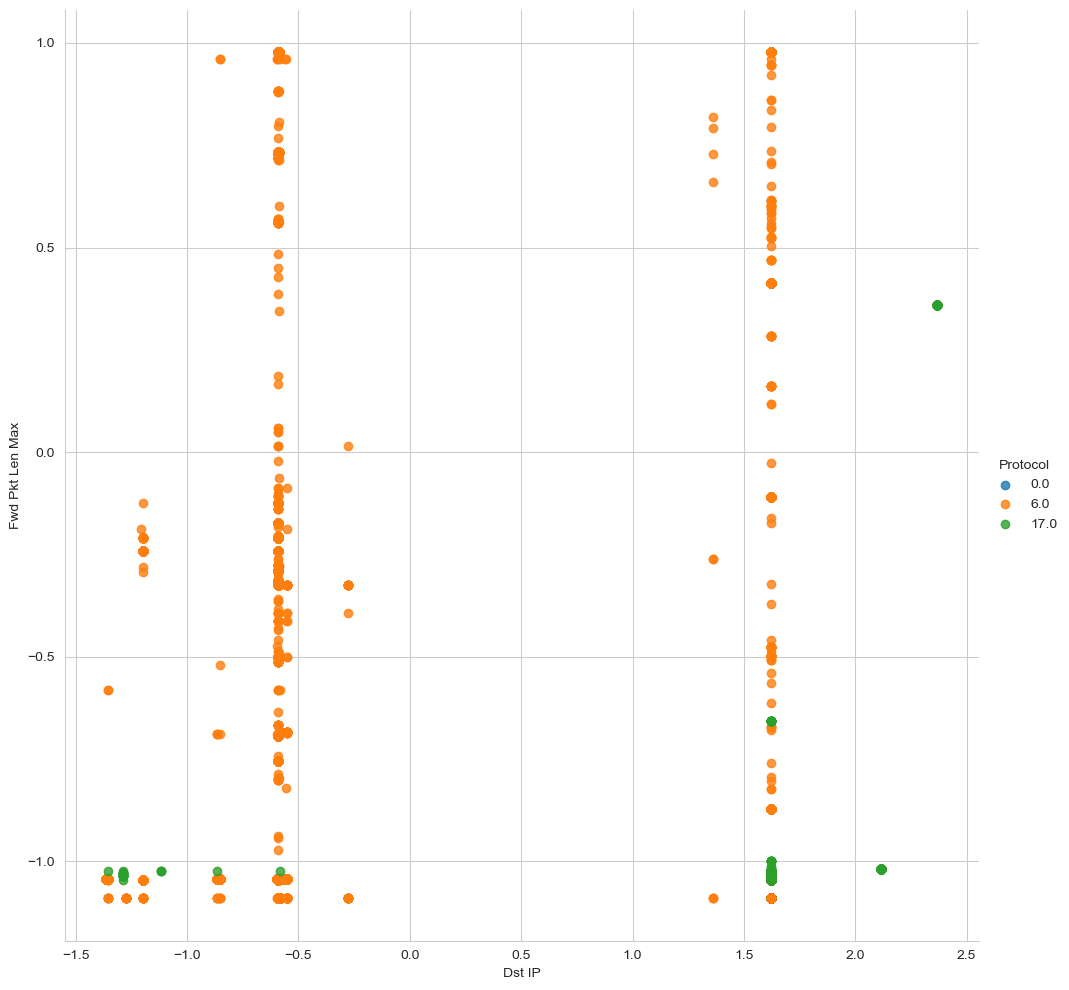

In [158]:
sns.lmplot(x = 'Dst IP', y = 'Fwd Pkt Len Max', data = filtered_data, fit_reg = False, hue = 'Protocol', size = 10, aspect = 1)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


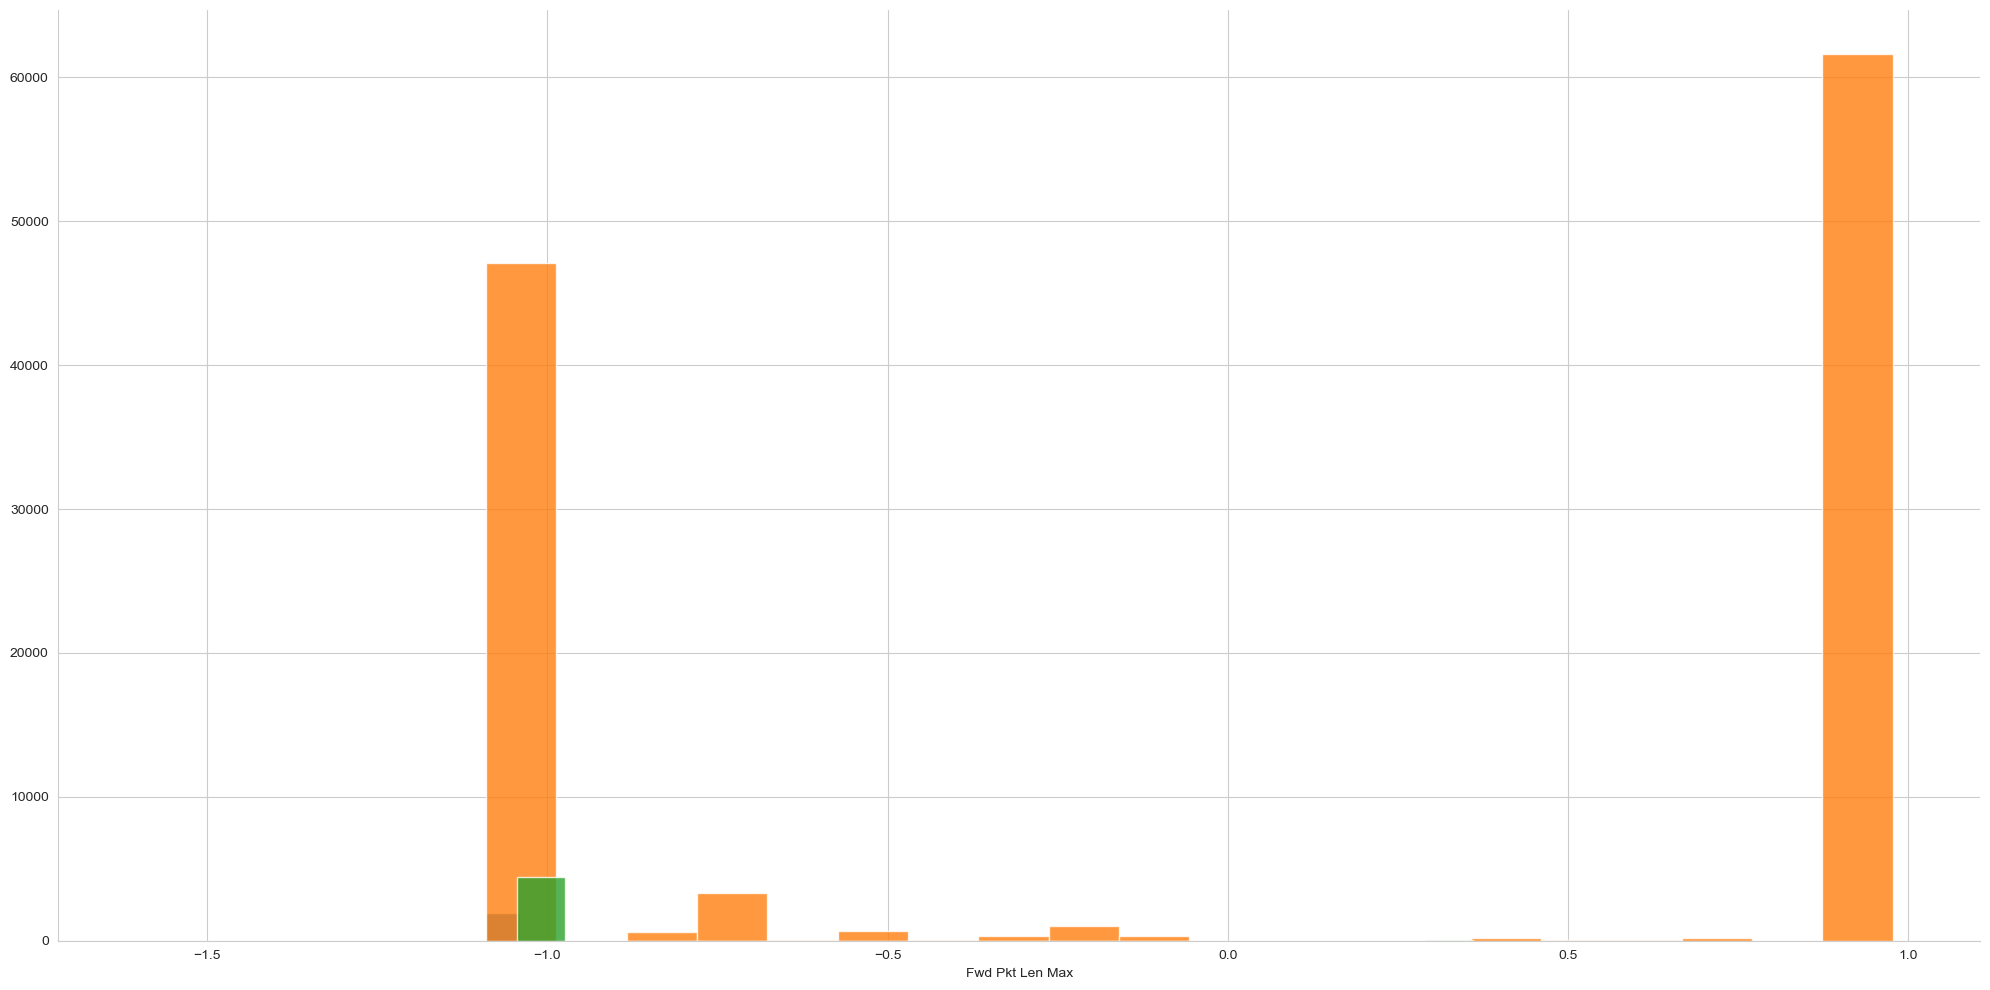

In [159]:
his = sns.FacetGrid(filtered_data, hue = 'Protocol', size = 10, aspect = 2)
his = his.map(plt.hist, 'Fwd Pkt Len Max', bins = 20, alpha = 0.8)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


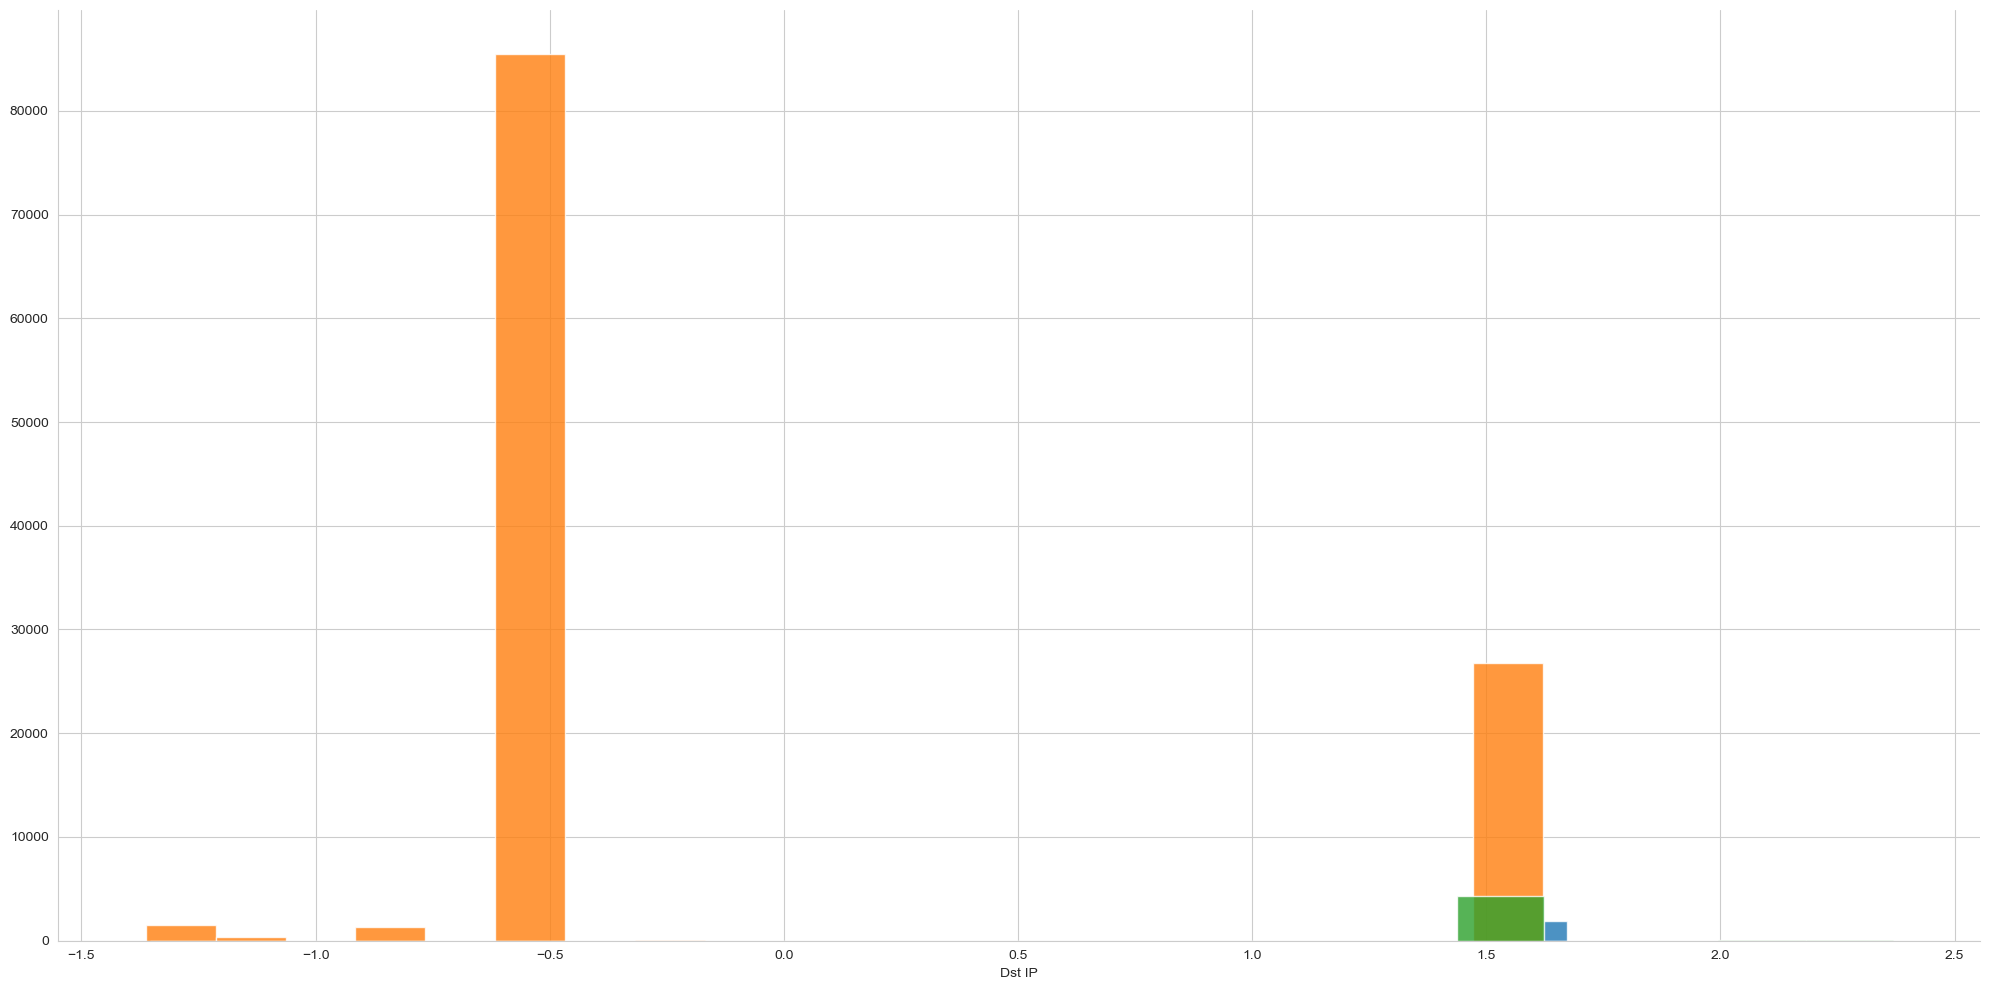

In [160]:
his = sns.FacetGrid(filtered_data, hue = 'Protocol', size = 10, aspect = 2)
his = his.map(plt.hist, 'Dst IP', bins = 20, alpha = 0.8)

[Text(0.5, 1.0, 'Src IP wise Count')]

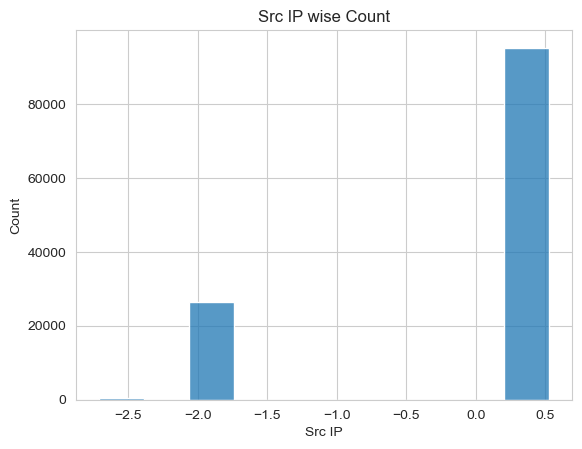

In [161]:
sns.histplot(filtered_data, x="Src IP", bins=10).set(title="Src IP wise Count")

[Text(0.5, 1.0, 'Dst IP wise Count')]

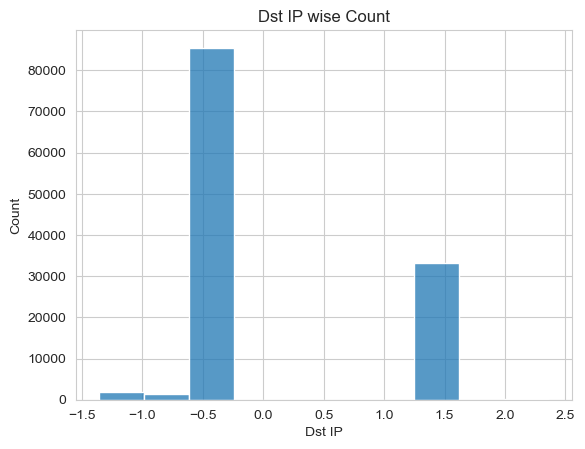

In [162]:
sns.histplot(filtered_data, x="Dst IP", bins=10).set(title="Dst IP wise Count")

[Text(0.5, 1.0, 'Src Port wise Count')]

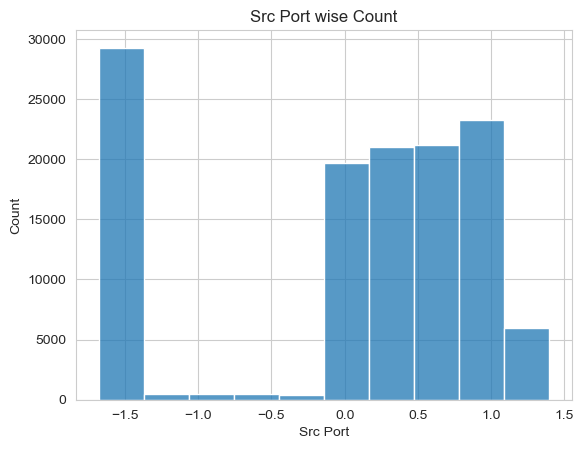

In [163]:
sns.histplot(filtered_data, x="Src Port", bins=10).set(title="Src Port wise Count")

[Text(0.5, 1.0, 'Flow Pkts/s wise Count')]

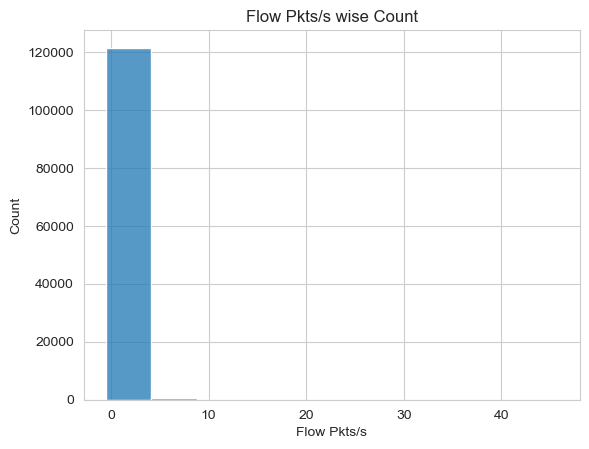

In [165]:
sns.histplot(filtered_data, x="Flow Pkts/s", bins=10).set(title="Flow Pkts/s wise Count")

[Text(0.5, 1.0, 'Flow Duration wise Count')]

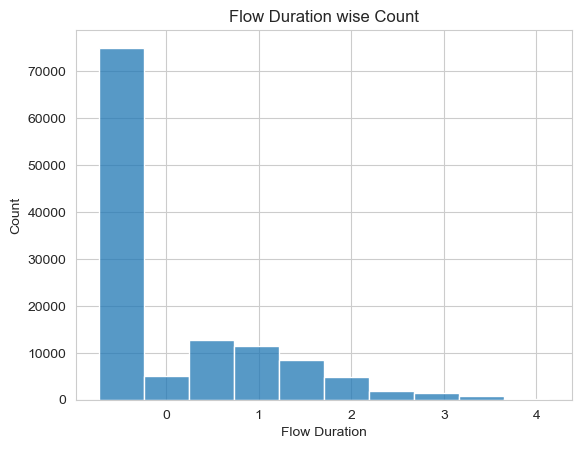

In [166]:
sns.histplot(filtered_data, x="Flow Duration", bins=10).set(title="Flow Duration wise Count")

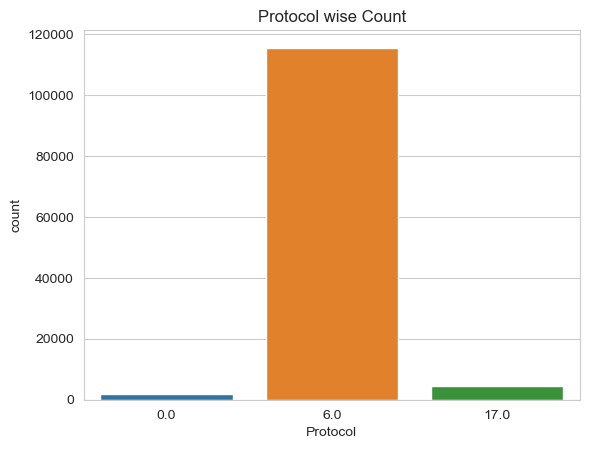

In [172]:
ax = sns.countplot(x="Protocol", data=filtered_data).set(title="Protocol wise Count")

In [177]:
# Function to get outlier count
def get_outliers_count(dataset, feature):
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3-Q1
    outliers_df = dataset[(dataset[feature] < (Q1 - 1.5 * IQR)) | (dataset[feature] > (Q3 + 1.5 * IQR))]
    return outliers_df, len(outliers_df)

Number of outliers 2311


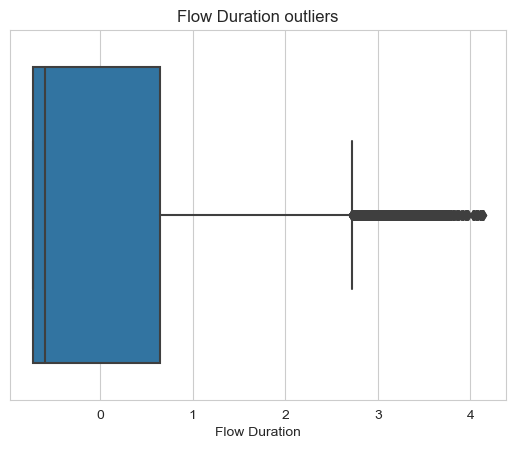

In [178]:
sns.boxplot(x="Flow Duration", data=data).set(title="Flow Duration outliers")
con_outliers_df, con_outliers_count = get_outliers_count(data, "Flow Duration")
print("Number of outliers", con_outliers_count)

Number of outliers 893


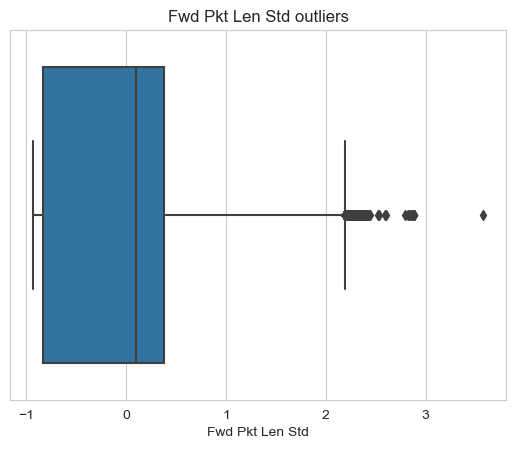

In [179]:
sns.boxplot(x="Fwd Pkt Len Std", data=data).set(title="Fwd Pkt Len Std outliers")
con_outliers_df, con_outliers_count = get_outliers_count(data, "Fwd Pkt Len Std")
print("Number of outliers", con_outliers_count)

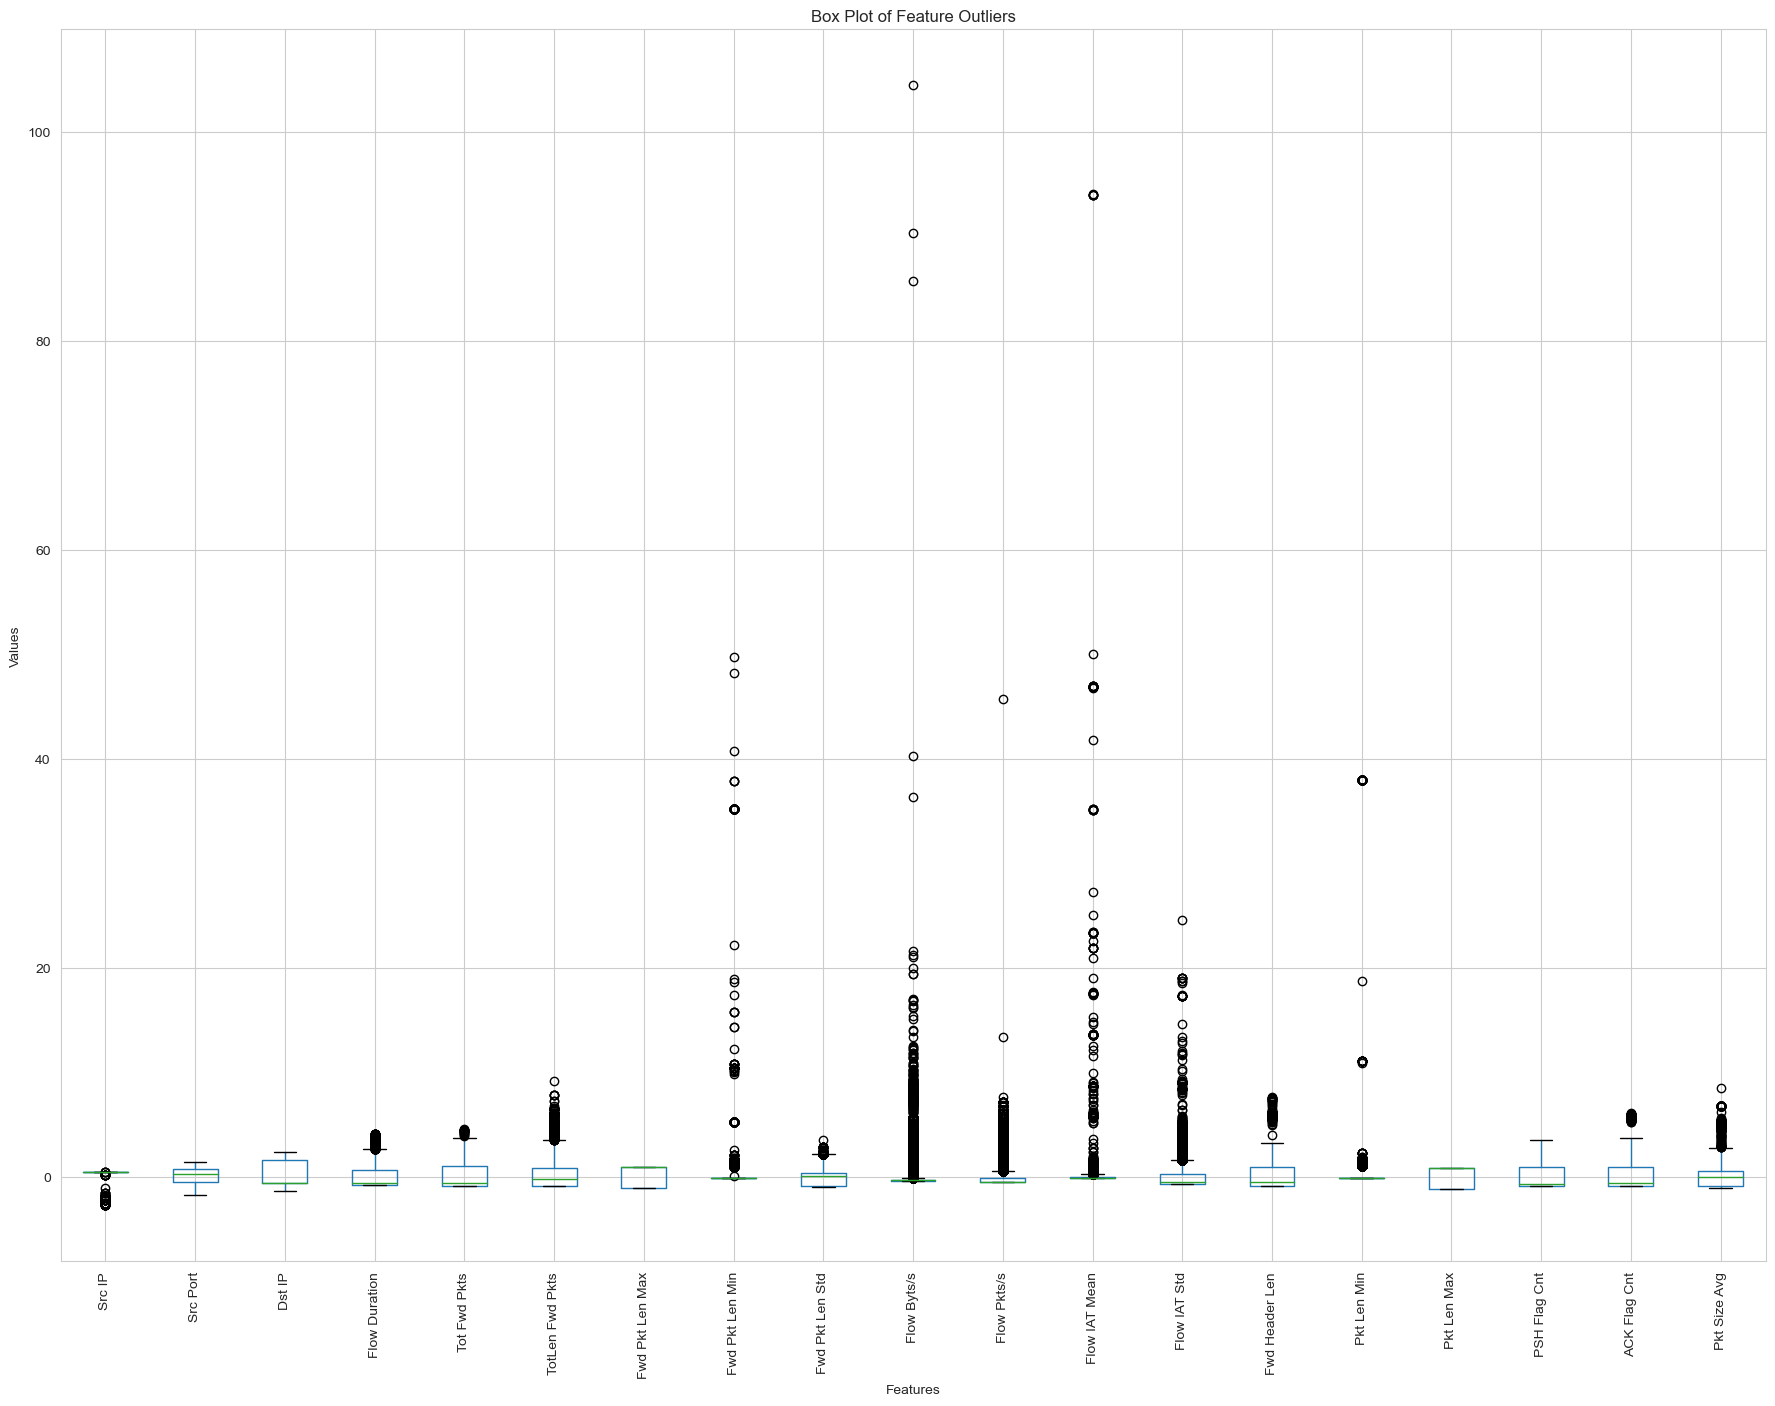

In [180]:
# Create a box plot for each feature
plt.figure(figsize=(22, 16))
filtered_data.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Feature Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [223]:
# from sklearn.feature_selection import mutual_info_regression

# # Calculate MI scores between each pair of columns
# mi_scores = []
# with open('mi_scores.csv', 'w') as file:
#     # Write the header row
#     file.write('col1,col2,mi\n')

#     for col1 in filtered_data.columns:
#         for col2 in filtered_data.columns:
#             if col1 == col2:
#                 continue
#             mi = mutual_info_regression(filtered_data[[col1]], filtered_data[[col2]], random_state=0)
#             # Write the data row
#             file.write(f'{col1},{col2},{mi}\n')



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Here I can use these scores to identify the most informative features in the dataset. 

One way to use these scores is to sort the pairs of features by their mutual information or chi-squared test scores, and select the top N(lets say 10) features with the highest scores. We can then use these N features as input to a machine learning algorithm, or as a reduced representation of your dataset for exploratory data analysis or visualization.

Another approach is to use clustering algorithms to group together features that are highly correlated with each other based on their mutual information or chi-squared test scores. This can help identify groups of related features that can be further analyzed or processed together.

In [224]:
# import pandas as pd
# from scipy.stats import chi2_contingency

# # Get the columns with data type 'category'
# cat_cols = filtered_data.select_dtypes(include=['object']).columns.tolist()

# all_chi2_results = pd.DataFrame(columns=['col1', 'col2', 'chi2'])

# significant_features = set()

# # Loop over all pairs of features
# for i, col1 in enumerate(cat_cols):
#     for j, col2 in enumerate(cat_cols[i+1:]):
#         # Select the two features
#         feature1 = filtered_data[col1]
#         feature2 = filtered_data[col2]

#         # Skip if the pair has already been tested or contains the same feature twice
#         if (col1, col2) in significant_features or (col2, col1) in significant_features or col1 == col2:
#             continue

#         # Create a contingency table and add small value to avoid zero values
#         contingency_table = pd.crosstab(feature1, feature2) + 0.001
#         # Calculate the chi-squared test statistic and p-value
#         chi2, p_value, dof, expected = chi2_contingency(contingency_table)
#         # Add to the results DataFrame if significant
#         if p_value < 0.05:
#             all_chi2_results = all_chi2_results.append({'col1': col1, 'col2': col2, 'chi2': chi2}, ignore_index=True)
#             significant_features.add((col1, col2))

#     # Break the loop if all significant features have been found
#     if len(significant_features) == len(cat_cols) * (len(cat_cols)-1) / 2:
#         break

# # Save the DataFrame to a CSV file
# all_chi2_results.to_csv('chi2_results.csv', index=False)



In [225]:
# Load the MI score file
mi_score_df = pd.read_csv('mi_scores.csv')

# Group the MI score dataframe by feature_1 and calculate the sum of MI score for each feature_1
mi_sum = mi_score_df.groupby('col1')['mi'].sum()

# Sort the MI sum values in descending order
mi_sum_sorted = mi_sum.sort_values(ascending=False)

# Select the top K features based on the MI sum
K = 10
selected_features = mi_sum_sorted[:K].index.tolist()

# Print the selected features
print(f'Top {K} features selected based on MI score: {selected_features}')



Top 10 features selected based on MI score: ['Src IP', 'Src Port', 'Dst IP', 'Fwd Pkt Len Std', 'TotLen Fwd Pkts', 'Flow Byts/s', 'Flow Duration', 'Fwd Pkt Len Max', 'ACK Flag Cnt', 'Pkt Size Avg']


We group the MI score dataframe by col1 using the groupby() function, and calculate the sum of MI score for each col1 using the sum() function. This gives us a new dataframe that has the sum of MI score for each feature.

We then sort the MI sum values in descending order using the sort_values() function, and select the top K features based on the MI sum using Python list slicing. Finally, we print the selected features.

Selecting the top K features based on MI score is just one possible approach to feature selection, and the optimal number of features to select may vary depending on the dataset and the task at hand.

In [227]:


# Load the chi-squared test file
chi2_df = pd.read_csv('chi2_results.csv')

# Group the chi-squared test dataframe by feature_1 and calculate the sum of chi-squared test for each feature_1
chi2_sum = chi2_df.groupby('col1')['chi2'].sum()

# Sort the chi-squared test sum values in descending order
chi2_sum_sorted = chi2_sum.sort_values(ascending=False)

# Select the top K features based on the chi-squared test sum
K = 10
selected_features = chi2_sum_sorted[:K].index.tolist()

# Print the selected features
print(f'Top {K} features selected based on chi-squared test: {selected_features}')


Top 10 features selected based on chi-squared test: ['Protocol']


In [211]:
filtered_data

,Src IP,Src Port,Dst IP,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd Header Len,Pkt Len Min,Pkt Len Max,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg
0,0.530355,-0.017253,-0.589784,6.0,0.233281,1.287908,0.988005,0.977229,-0.087399,0.227579,-0.270287,-0.476252,-0.049836,-0.255007,1.249060,-0.084344,0.918516,1.605342,1.302780,1.0,0.524657
1,-1.874354,-1.658862,1.621584,6.0,0.966995,1.467410,2.789330,0.977229,-0.087399,1.514992,-0.295627,-0.478485,0.011059,0.386161,1.424547,-0.084344,0.918516,1.176854,1.296095,0.0,0.610176
2,0.530355,0.900759,-0.589785,6.0,0.639469,1.149829,1.058610,0.977229,-0.087399,0.362183,-0.301503,-0.477958,-0.010426,0.297353,1.114071,-0.084344,0.918516,1.215808,1.195822,1.0,0.140008
3,0.530355,-0.007013,-0.589785,6.0,1.291350,1.163637,0.991858,0.977229,-0.087399,0.341375,-0.304525,-0.478898,0.034280,1.186749,1.127570,-0.084344,0.918516,1.410575,1.342890,1.0,0.433322
4,0.530355,0.441753,-0.589785,6.0,1.342100,1.384563,1.162293,0.977229,-0.087399,0.229682,-0.304579,-0.478893,0.033882,0.694068,1.343553,-0.084344,0.918516,1.241777,1.403054,1.0,0.426915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122002,0.530355,0.334282,-0.279048,6.0,-0.729105,-0.866115,-0.866855,-1.090307,-0.087399,-0.935860,-0.333400,-0.457862,-0.094630,-0.660399,-0.848674,-0.084344,-1.137813,-0.822756,-0.829699,1.0,-1.059932
122003,0.530355,1.077185,-0.589784,6.0,2.422507,1.950684,1.315857,0.977229,-0.087399,0.109299,-0.305767,-0.479246,0.060561,1.385500,1.905109,-0.084344,0.918516,2.267551,2.091597,1.0,0.597880
122004,0.530355,1.150836,1.621584,17.0,-0.729027,-0.866115,-0.864729,-1.044991,1.015378,-0.935860,-0.287897,-0.459179,-0.092578,-0.660399,-0.864873,1.105396,-1.070208,-0.822756,-0.843069,1.0,-0.690966
122005,0.530355,0.334282,-0.279048,6.0,-0.627169,-0.686613,-0.778383,-0.325602,-0.087399,-0.116543,-0.279810,-0.477357,-0.024536,-0.454871,-0.659689,-0.084344,0.918516,-0.692911,-0.669262,0.0,0.647270


Calculating the sum of the chi-squared test statistics for each feature is one way to aggregate the information from all the pairwise chi-squared tests involving that feature. This can help us identify which features have the strongest associations with the target variable or with other features in the dataset.

Specifically, by summing up the chi-squared test statistics for each feature, we obtain a measure of the overall importance of that feature in predicting the target variable or in distinguishing between different classes of the target variable (if applicable). This is because the chi-squared test statistic measures the degree of association between two categorical variables, and by summing up the test statistics across all pairwise combinations of a given feature with other features, we can get an idea of how informative that feature is in distinguishing between different categories of the target variable.

Furthermore, by sorting the features based on their chi-squared test sums and selecting the top K features, we can perform feature selection to reduce the dimensionality of the dataset and improve the performance of machine learning models.


In [217]:
# # 


# from sklearn.cluster import KMeans
# #  Apply K-Means clustering
# kmeans = KMeans(n_clusters=2, random_state=0)
# clusters = kmeans.fit_predict(filtered_data)

# # Analyze the clusters
# cluster_counts = pd.Series(clusters).value_counts()
# suspicious_cluster = cluster_counts.idxmin()
# suspicious_data = filtered_data[clusters == suspicious_cluster]


# suspicious_cluster
# # print("Suspicious Data:")
# # print(suspicious_data)

# # # Calculate cluster statistics
# # cluster_statistics = []
# # for cluster_id, count in cluster_counts.items():
# #     cluster_data = filtered_data[clusters == cluster_id]
# #     cluster_stats = cluster_data.describe()
# #     cluster_stats['count'] = count
# #     cluster_statistics.append(cluster_stats)

# # # Print cluster statistics
# # print("Cluster Statistics:")
# # for cluster_stats in cluster_statistics:
# #     print(cluster_stats)
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1

# this code performs k-means clustering on the filtered_data dataset, identifies the cluster with the fewest data points as the suspicious cluster, and extracts the corresponding data points into the suspicious_data variable for further analysis or investigation.

In [209]:
# # load the dataset
# df = pd.read_csv('network_traffic_clusters.csv')

# # create a scatter plot of the data colored by the predicted cluster labels
# plt.scatter(df['Feature1'], df['Feature2'], c=kmeans.labels_, cmap='viridis')
# plt.xlabel('Feature1')
# plt.ylabel('Feature2')
# plt.show()

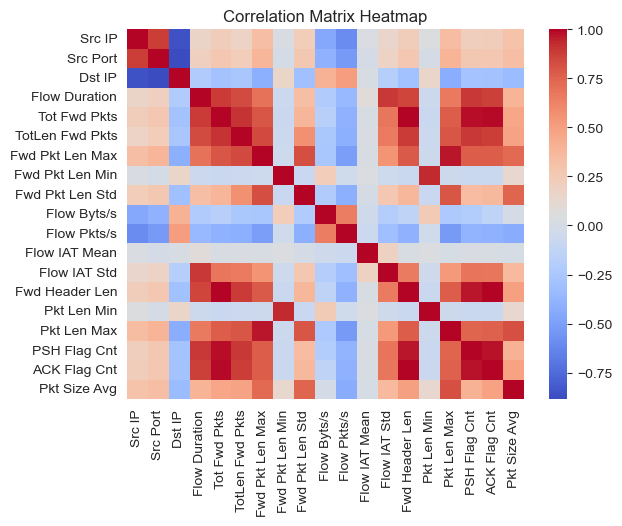

In [218]:
# Calculate the correlation matrix
corr = filtered_data.corr()

sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()




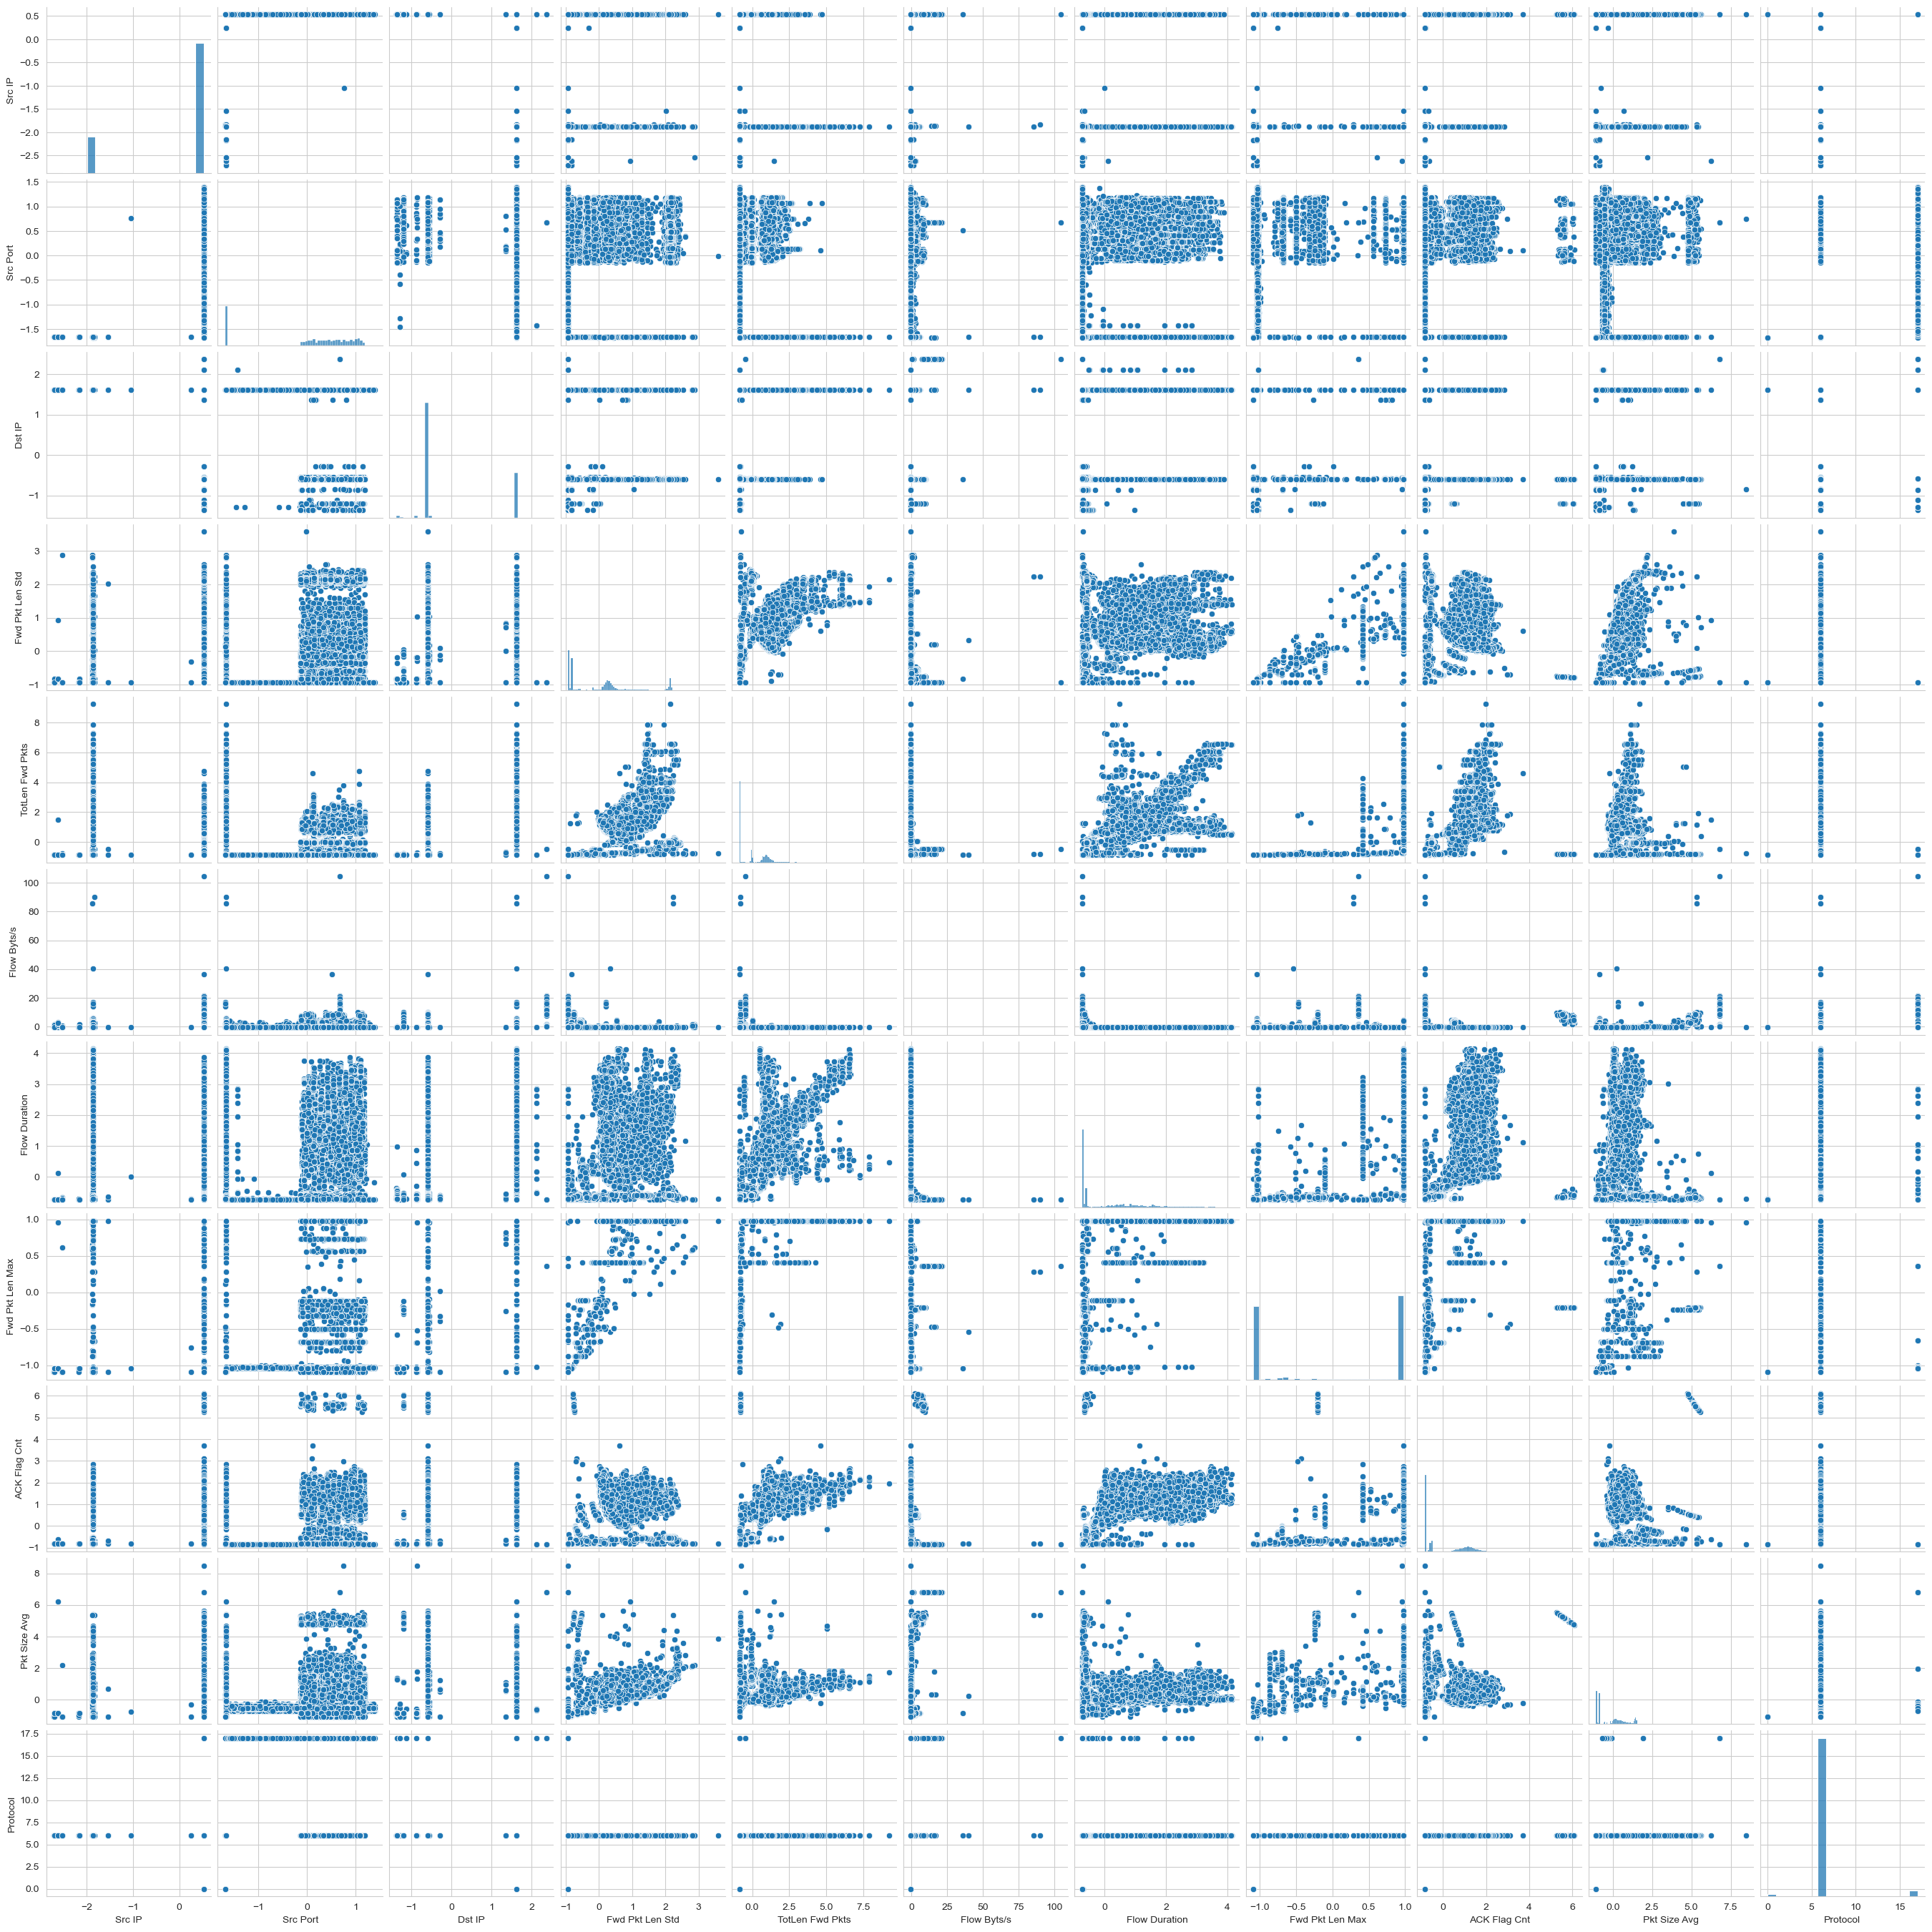

In [228]:
features1 = ['Src IP', 'Src Port', 'Dst IP', 'Fwd Pkt Len Std', 'TotLen Fwd Pkts', 'Flow Byts/s', 'Flow Duration', 'Fwd Pkt Len Max', 'ACK Flag Cnt', 'Pkt Size Avg', 'Protocol']

# Create scatter plot matrix
sns.pairplot(filtered_data[features1], diag_kind='hist')

The anomaly score quantifies the deviation of a data point from the expected normal behavior, with higher scores indicating a higher likelihood of being an anomaly. It serves as a relative measure for ranking and comparing the anomalousness of different data points in a dataset.

For example, I can use line charts to track the volume of traffic over time, or pie charts to show the distribution of traffic by application or protocol.

A common approach is to set a fixed threshold, such as 0.5, or determine it dynamically by analyzing the distribution of anomaly scores in your dataset.

Compare the anomaly scores of each data point with the threshold you set. If a data point's score is above the threshold, it is considered an anomaly; otherwise, it is considered normal.

Look at the specific features or patterns in the data that contributed to their high anomaly scores. This analysis can provide insights into potential issues or interesting phenomena within your dataset

In [239]:

# Create a new DataFrame with only the selected features
X = filtered_data[features1]

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter based on your dataset

# Fit the model to the data
model.fit(X)

# Predict the anomaly scores for each data point
anomaly_scores = model.decision_function(X)

# Create a DataFrame with the anomaly scores
anomaly_df = pd.DataFrame({'AnomalyScore': anomaly_scores})

# Sort the data points by their anomaly scores
anomaly_df['DataPoint'] = range(len(anomaly_df))
anomaly_df = anomaly_df.sort_values(by='AnomalyScore', ascending=False).reset_index(drop=True)


# Determine the threshold for anomaly classification
threshold = anomaly_df['AnomalyScore'].quantile(0.95)  # Adjust the quantile value based on your preference

# Classify anomalies based on the threshold
anomaly_df['IsAnomaly'] = anomaly_df['AnomalyScore'] > threshold

# Print the top 10 anomalous data points
top_anomalies = anomaly_df.head(10)
print(top_anomalies)

# Interpret the anomalies
for index, row in top_anomalies.iterrows():
    if row['IsAnomaly']:
        print("Data point {} is an anomaly with a score of {}".format(row['DataPoint'], row['AnomalyScore']))
    else:
        print("Data point {} is not an anomaly with a score of {}".format(row['DataPoint'], row['AnomalyScore']))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


   AnomalyScore  DataPoint  IsAnomaly
0      0.199753     115939       True
1      0.199753      71267       True
2      0.199753      76237       True
3      0.199753      76242       True
4      0.199753      76234       True
5      0.199753      76238       True
6      0.199753     114286       True
7      0.199721      99129       True
8      0.199721      99118       True
9      0.199721      99119       True
Data point 115939 is an anomaly with a score of 0.19975264919879016
Data point 71267 is an anomaly with a score of 0.19975264919879016
Data point 76237 is an anomaly with a score of 0.19975264919879016
Data point 76242 is an anomaly with a score of 0.19975264919879016
Data point 76234 is an anomaly with a score of 0.19975264919879016
Data point 76238 is an anomaly with a score of 0.19975264919879016
Data point 114286 is an anomaly with a score of 0.19975264919879016
Data point 99129 is an anomaly with a score of 0.19972143482722904
Data point 99118 is an anomaly with a score 

The anomaly scores generated by the Isolation Forest algorithm typically range between 0 and 1. A score close to 1 indicates a high likelihood of being an anomaly, while a score close to 0 indicates a low likelihood of being an anomaly.

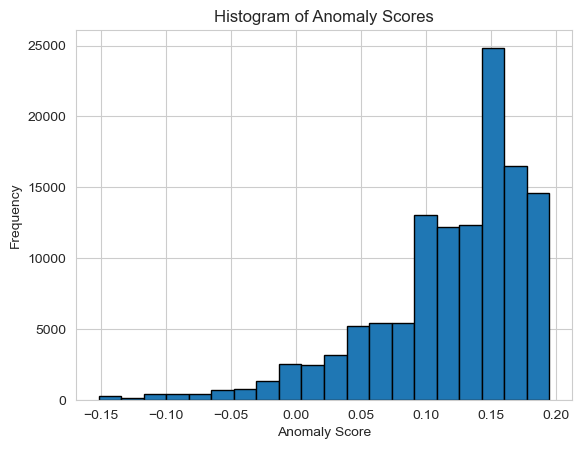

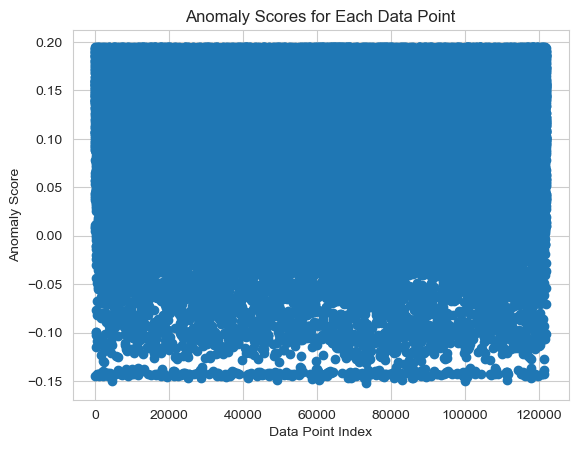

In [234]:
nomaly_scores = anomaly_df['AnomalyScore']

# Histogram of anomaly scores
plt.hist(anomaly_scores, bins=20, edgecolor='black')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.show()

# Scatter plot of anomaly scores
plt.scatter(anomaly_df.index, anomaly_scores)
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores for Each Data Point')
plt.show()